## load models and sample images

In [3]:
import cv2 
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

from os import listdir
from os.path import isfile, join

Get Neural Style Transfer Models<br>
Paper: [Perceptual Losses for Real-Time Style Transfer and Super-Resolution by Johnson et al.](https://arxiv.org/pdf/1603.08155.pdf)

Windows Commands:

In [4]:
# !curl https://moderncomputervision.s3.eu-west-2.amazonaws.com/NeuralStyleTransfer.zip<br>
# !tar -xf .\NeuralStyleTransfer.zip<br>

Linux Commands:

In [5]:
# !wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/NeuralStyleTransfer.zip<br>
# !unzip -qq .\NeuralStyleTransfer.zip

In [6]:
model_file_path = "NeuralStyleTransfer/models/"
model_file_paths = [f for f in listdir(model_file_path) if isfile(join(model_file_path, f))]

print(model_file_paths)

['candy.t7', 'composition_vii.t7', 'feathers.t7', 'la_muse.t7', 'mosaic.t7', 'starry_night.t7', 'the_scream.t7', 'the_wave.t7', 'udnie.t7']


In [7]:
def imshow(image=None, title="sample image", cmap=None):
    plt.imshow(image, cmap=cmap) # cv2.cvtColor(image, cv2.COLOR_BAYER_BG2RGB)
    plt.title(title)
    plt.show()

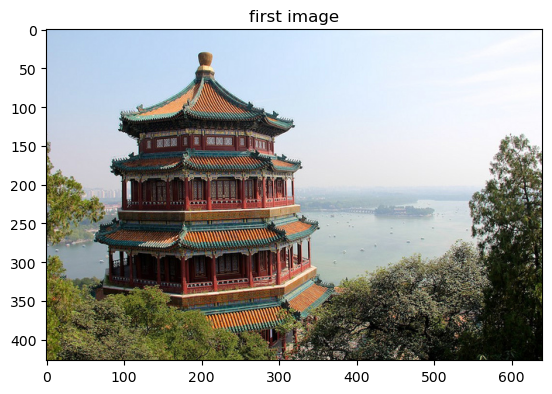

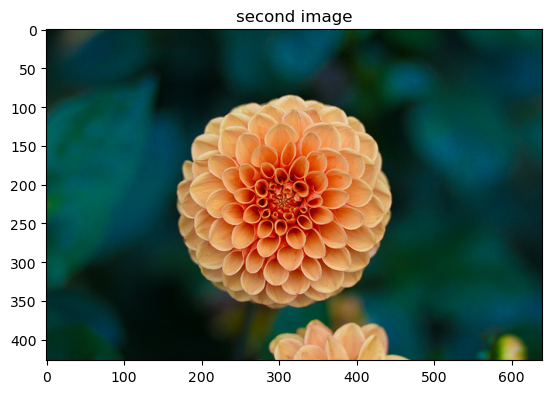

In [8]:
im1, im2 = load_sample_images().images
imshow(im1, 'first image')
imshow(im2, 'second image')

## load models as cache

In [38]:
def cache_all_models(paths):
    models_cache = {}
    model_file_path = "NeuralStyleTransfer/models/"
    art_file_path = "NeuralStyleTransfer/art/"
    for model in paths:
        nst_model = cv2.dnn.readNetFromTorch(model_file_path+model)
        style = cv2.imread(art_file_path+str(model)[:-3]+".jpg")
        models_cache[model[:-3]] = [nst_model, style]

    return models_cache

In [40]:
models_cache = cache_all_models(model_file_paths)
len(models_cache),\
models_cache.keys()

(9,
 dict_keys(['candy', 'composition_vii', 'feathers', 'la_muse', 'mosaic', 'starry_night', 'the_scream', 'the_wave', 'udnie']))

In [44]:
def gen_in_style_of(style=None, img=None, models=models_cache):

    if style == None: print('Enter valid style')
    elif not style in models.keys(): print(f'Unsupported style: {style}\nUse one of the following: {list(models.keys())}')
    else: 
        # loading cached models for style
        nst_model, style_img = models[style]

        # resize 
        height, width = int(img.shape[0]), int(img.shape[1])
        newWidth = int((640 / height) * width)
        resizedImg = cv2.resize(img, (newWidth, 640), interpolation = cv2.INTER_AREA)

        return resizedImg
        print('done')

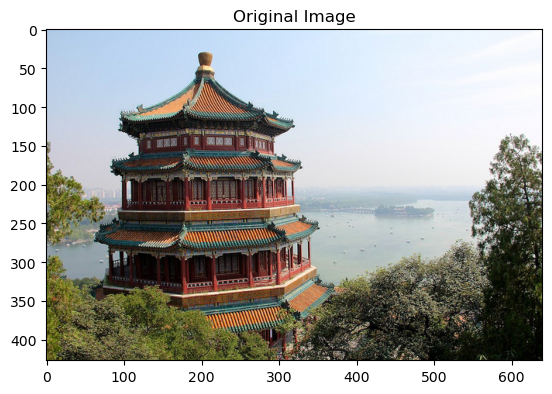

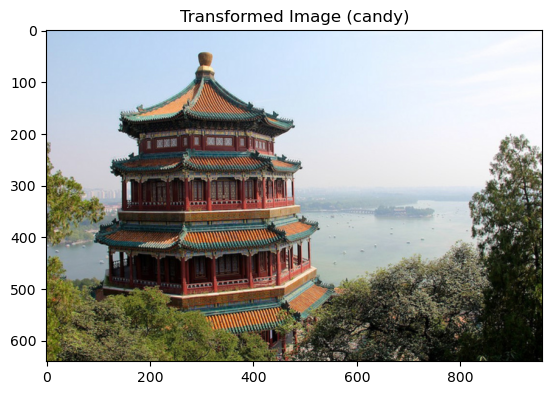

In [49]:
style = 'candy'
new_img = gen_in_style_of(style, im1)
imshow(im1, "Original Image")
imshow(new_img, f"Transformed Image ({style})")